start: 2020/05/07 03:18:58
score[00]: 0.0035555948579214514
score[01]: 0.004802378602819735
score[02]: 0.004171496248080442
score[03]: 0.004582602860248475
score[04]: 0.005302601412125574
score[05]: 0.003996358385520371
score[06]: 0.004176079514410791
score[07]: 0.0042694914005814155
score[08]: 0.0038191183125999557
score[09]: 0.005416477966189381
score[10]: 0.004513650094095545
score[11]: 0.004098192609407025
score[12]: 0.0038951553088922846
score[13]: 0.005181670824146223
score[14]: 0.0037068983882743156
score[15]: 0.004715966322435761
score[16]: 0.005213928564261838
score[17]: 0.0038567750742479756
score[18]: 0.00457501157782092
score[19]: 0.0034314881272337065
score[20]: 0.0041318662122245
score[21]: 0.0037194265303622793
score[22]: 0.004304167783411472
score[23]: 0.003853548485690084
score[24]: 0.004812260811411062
score[25]: 0.004847076256788485
score[26]: 0.004501566329809026
score[27]: 0.003930134542763919
score[28]: 0.004481223694757008
score[29]: 0.004030568411792723
score[30

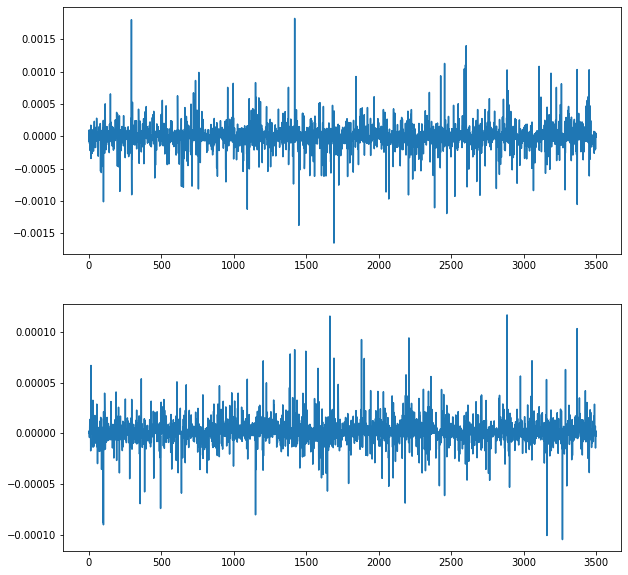

end: 2020/05/07 03:21:18


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:]
    y_predict = list(b.model.predict(x))

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v6"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    print(f"score[avg]: {b.calc_avg_score()}")
    plot(b)

    test_start = int(len(b.data) * 0.8)  # 最後20%のデータでテスト
    b.data_train = b.data[b.train_columns][:test_start]
    b.label_train = b.data["result"][:test_start]
    b.train()
    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(b.model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()